# Plotting data and writing functions

## First: let's make a csv file with some data

By now, you should be able to extract the frequency of a word from a file or files and save this data in a csv file

In [129]:
import glob
from os import chdir as cd
from collections import Counter
from string import punctuation as pnc


pathout = '/Users/ethan/Desktop/Adam_words.csv'
datapath = '/Users/ethan/Desktop/Brown/Adam/'

header = 'age,freq of I,\n'

with open(pathout, 'a+') as nf:
    nf.write(header)

cd(datapath)

removelist = ['\t', '\r']

punct = set(pnc)

for file in glob.glob('*.cha'):
    with open(file,'r') as f:
        text = f.read()

        for item in removelist:
            text = text.replace(item, '')
        text = text.split('\n')
        
        for item in text:
            if '|CHI|' in item:
                a = item
            
        a = a.split('|')
        age = a[3]

        turns = []
        for line in text:
            if line.startswith('*CHI'):
                line = line.replace('*CHI:', '')
                line = ''.join(x for x in line if x not in punct) 
                line = line.strip()
                turns.append(line)

        allturns = ' '.join(turns)
        words = allturns.split()
        tokens = len(words)

        
        freq = Counter(words).most_common(len(words))

        for item in freq:
            if item[0] == 'I':
                icounter = item[1]
        prop_freq = str(icounter/tokens)
        
        newline = age + ',' + prop_freq[:5] + '\n'
    
        with open(pathout, 'a+') as nf:
            nf.write(newline)

print('All done!')

All done!


In [130]:
from os import chdir as cd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


pathin = '/Users/ethan/Desktop/'
file = 'Adam_words.csv'

cd(pathin)

df = pd.read_csv(file)

In [131]:
df.head(10)

,age,freq of I,Unnamed: 2
0,2;4.30,0.013,NaN
1,2;8.01,0.006,NaN
2,3;10.15,0.065,NaN
3,3;9.16,0.058,NaN
4,2;7.14,0.013,NaN
5,2;4.15,0.005,NaN
6,2;8.16,0.013,NaN
7,2;5.12,0.009,NaN
8,2;6.03,0.015,NaN
9,2;9.04,0.000,NaN


In [132]:
# Convert age in Year;Months.Days to age in Months and add to dataframe

age = list(df.loc[:,'age'])
years_in_days = []
months_in_days = []
days_in_days = []
for item in age:
    item = item.split(';')
    y = int(item[0])*365
    item2 = item[1].split('.')
    m = int(item2[0])*30
    d = int(item2[1])
    years_in_days.append(y)
    months_in_days.append(m)
    days_in_days.append(d)
    
age_in_days = list(zip(years_in_days, months_in_days, days_in_days))



age_in_months = []
for item in age_in_days:
    a = int(sum(item)/30)
    age_in_months.append(a)

df['age(months)'] = age_in_months

In [133]:
df.head(10)


,age,freq of I,Unnamed: 2,age(months)
0,2;4.30,0.013,NaN,29
1,2;8.01,0.006,NaN,32
2,3;10.15,0.065,NaN,47
3,3;9.16,0.058,NaN,46
4,2;7.14,0.013,NaN,31
5,2;4.15,0.005,NaN,28
6,2;8.16,0.013,NaN,32
7,2;5.12,0.009,NaN,29
8,2;6.03,0.015,NaN,30
9,2;9.04,0.000,NaN,33


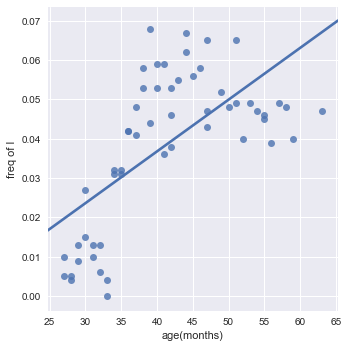

In [134]:
sns.lmplot(x="age(months)", y="freq of I", data=df,
           ci = None)

In [11]:
def text_stats(text, speaker, word):
    from string import punctuation as pnc
    from collections import Counter
    sp = '*' + speaker
    text = text.split('\n')
    for item in text:
        if '|CHI|' in item:
            a = item

    a = a.split('|')
    age = a[3]
    
    years_in_days = []
    months_in_days = []
    days_in_days = []

    item = age.split(';')
    y = int(item[0])*365
    item2 = item[1].split('.')
    m = int(item2[0])*30
    d = int(item2[1])
    years_in_days.append(y)
    months_in_days.append(m)
    days_in_days.append(d)

    age_in_days = list(zip(years_in_days, months_in_days, days_in_days))

    for item in age_in_days:
        a = int(sum(item)/30)
        age = a
        

    turns = []
    for line in text:
        if line.startswith(sp):
            line = line.replace(sp, '')
            line = ''.join(x for x in line if x not in pnc) 
            line = line.strip()
            turns.append(line)

    allturns = ' '.join(turns)
    words = allturns.split()
 
    tokens = len(words)
    types = len(set(words))

    freq = Counter(words).most_common(len(words))

    for item in freq:
        if item[0] == word:
            word_counter = item[1]
    prop_freq = word_counter/tokens
    
    return(age, tokens, types, prop_freq)

In [16]:
#read file into python

import os
pathin = '/Users/ethan/Desktop/Brown/Adam/'
file = 'adam01.cha'


os.chdir(pathin)

with open(file,'r') as f:
    text = f.read()
    
    data = text_stats(text, 'CHI', 'I')

In [17]:
print(data)

(27, 2824, 370, 0.010623229461756374)


In [6]:
#read text from folder into python

import os
import glob

pathin = '/Users/ethan/Desktop/Brown/Adam/'

os.chdir(pathin)

for file in glob.glob('*.cha'):
    with open(file,'r') as f:
        text = f.read()
        
        data = text_stats(text, 'CHI', 'I')
        print(data)


(29, 2045, 371, 0.013691931540342298)
(32, 2524, 390, 0.006339144215530904)
(47, 2350, 443, 0.06553191489361702)
(46, 3424, 492, 0.058703271028037386)
(31, 2655, 411, 0.013559322033898305)
(28, 1569, 304, 0.0057361376673040155)
(32, 1959, 376, 0.013272077590607452)
(29, 1983, 302, 0.009581442259203227)
(30, 2399, 399, 0.015006252605252188)
(33, 1390, 317, 0.0007194244604316547)
(35, 2722, 463, 0.03159441587068332)
(28, 2130, 314, 0.004225352112676056)
(27, 2911, 367, 0.005496392992098935)
(34, 1757, 331, 0.03130335799658509)
(40, 3738, 527, 0.053237025147137504)
(33, 1517, 320, 0.004614370468029005)
(34, 2151, 357, 0.032543003254300325)
(27, 2824, 370, 0.010623229461756374)
(41, 3954, 560, 0.05918057663125948)
(54, 3867, 621, 0.047840703387638996)
(55, 4457, 625, 0.046219430109939424)
(53, 3969, 614, 0.0491307634164777)
(58, 3940, 612, 0.048730964467005075)
(57, 3269, 549, 0.04986234322422759)
(52, 3912, 570, 0.04013292433537832)
(55, 3883, 562, 0.045583311872263714)
(51, 3317, 524, 0.

In [7]:
#read text from folder into python

import os
import glob

pathin = '/Users/ethan/Desktop/Brown/Adam/'

os.chdir(pathin)

data = []

for file in glob.glob('*.cha'):
    with open(file,'r') as f:
        text = f.read()
        
        output = text_stats(text, 'CHI', 'I')
        data.append(output)




In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

df = pd.DataFrame(data, columns = ['age', 'tokens', 'types', 'frequency'])


In [9]:
df.head(10)

,age,tokens,types,frequency
0,29,2045,371,0.013692
1,32,2524,390,0.006339
2,47,2350,443,0.065532
3,46,3424,492,0.058703
4,31,2655,411,0.013559
5,28,1569,304,0.005736
6,32,1959,376,0.013272
7,29,1983,302,0.009581
8,30,2399,399,0.015006
9,33,1390,317,0.000719


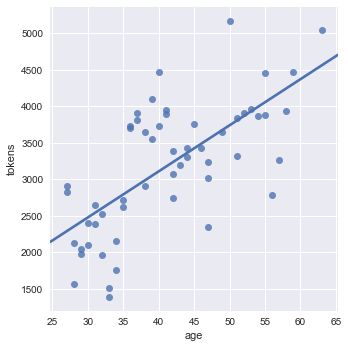

In [156]:
sns.lmplot(x="age", y="tokens", data=df,
           ci = None)

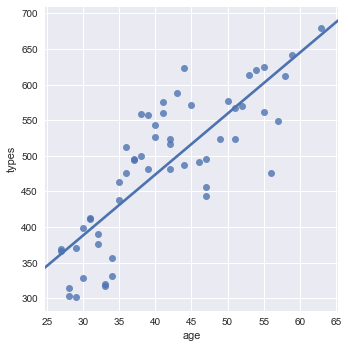

In [157]:
sns.lmplot(x="age", y="types", data=df,
           ci = None)

## You can also save your plot as an impage file for pasting into your paper

1. give the plot a name by putting it in a variable
2. use ```savefig``` to save the plot

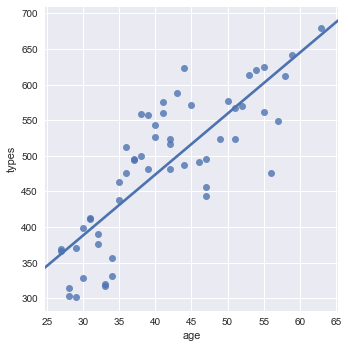

In [10]:
p = sns.lmplot(x="age", y="types", data=df,
           ci = None)
p.savefig("plot.png")

# Assignment

1. Use the above code to define a function that extracts age, tokens, types, frequency of a word, and anything else you like
2. Use Seaborn to plot your data with a trend line
3. Try finding data for the mother's speech
4. Try finding frequency data for different words